# 1. Data Cleaning

## Import Packages and Defining Helper Functions

### Import Packages

In [1]:
# import required packages
#warnings :)
import warnings
warnings.filterwarnings('ignore')

# for df purpose
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
tqdm.pandas()

# for text processing
import nltk
import re
import string
from google_trans_new import google_translator

# for graph plotting / visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#for storing intermediate results
import pickle

# for notebook function
from IPython.display import display, clear_output
import time
from multiprocessing.dummy import Pool as ThreadPool

### Helper Functions

In [2]:
def print_bold(text):
    text_bold = '\x1b[1;30;47m'+text+ '\x1b[0m'
    print(text_bold)
def glance(x,n=5):
    try:
        iterator = iter(x)
    except:
        print(x)
        return
    else:
        if type(x) == str or len(str(x)) <= 50:
            print(x)
            return
        if type(x) == dict:
            iterator = x.items()
        i = 0
        for ele in iterator:
            if i >= n:
                break
            glance(ele,n)
            i += 1

## Read Data

In [20]:
df_fb = pd.read_csv('data/facebook_data.csv',index_col=0)
df_fb['Platform'] = 'Facebook'

In [21]:
df_fb.describe()

,comment,page_id,share
count,2169.000000,3.892000e+03,873.000000
mean,21.158598,4.407668e+14,5.676976
std,66.889826,2.838738e+14,9.159576
min,0.000000,2.886973e+11,1.000000
25%,2.000000,2.088942e+14,1.000000
50%,5.000000,4.744189e+14,3.000000
75%,13.000000,6.176043e+14,6.000000
max,887.000000,9.674363e+14,137.000000


In [22]:
df_fb.dtypes

comment        float64
date            object
filters         object
page_id          int64
page_name       object
raw             object
reaction        object
search_term     object
share          float64
title           object
Platform        object
dtype: object

In [23]:
df_twitter = pd.read_csv('data/twitter_data.csv',index_col=0)
df_twitter['Platform'] = 'Twitter'
df_twitter

,UserScreenName,UserName,Timestamp,Text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,Platform
0,Kevin Koo Seng Kiat,@kevinkoosk,2015-01-03T08:18:41.000Z,Flood victims on Malaysia's east coast require...,NaN,NaN,1.0,NaN,https://pbs.twimg.com/media/B6aUvXZCAAIMwHZ?fo...,https://twitter.com/kevinkoosk/status/55129154...,Twitter
1,Zashnain Zainal,@bedlamfury,2015-01-01T11:40:30.000Z,#Banjir: KKM mohon orang ramai derma darah « M...,NaN,NaN,1.0,NaN,NaN,https://twitter.com/bedlamfury/status/55061755...,Twitter
2,Malaysia Agent,@malaysia_agent,2015-01-07T16:39:02.000Z,Floods: Blood donation campaign exceeds target...,NaN,NaN,NaN,NaN,NaN,https://twitter.com/malaysia_agent/status/5528...,Twitter
3,SME Bank,@SME_Bank,2015-01-12T01:57:17.000Z,Blood Donation Campaign\n\nThe National Blood ...,NaN,NaN,NaN,NaN,NaN,https://twitter.com/SME_Bank/status/5544570548...,Twitter
4,Anak Sarawak,@sarawak_twt,2015-01-14T15:03:07.000Z,"Mun nak cerita psl blood donation, masa jd cur...",NaN,NaN,NaN,2.0,NaN,https://twitter.com/sarawak_twt/status/5553795...,Twitter
...,...,...,...,...,...,...,...,...,...,...,...
397,zaidalifah aisheteru,@zaidalifah,2019-04-03T02:49:20.000Z,3/4/2019 \nProgram Derma Darah MAKSAK Malaysia...,NaN,NaN,NaN,1.0,NaN,https://twitter.com/zaidalifah/status/11132722...,Twitter
398,BloodBankHUS,@BloodBankHUS,2019-04-02T09:40:04.000Z,Terima kasih kepada Institut Latihan Kementeri...,NaN,NaN,NaN,NaN,NaN,https://twitter.com/BloodBankHUS/status/111301...,Twitter
399,RTM Malaysia,@RTM_Malaysia,2019-03-31T02:15:10.000Z,PROGRAM DERMA DARAH ANJURAN KULIYYAH ICT IIUM ...,🗓 ⏳ 🏢,NaN,9.0,1.0,https://abs-0.twimg.com/emoji/v2/svg/1f5d3.svg,https://twitter.com/RTM_Malaysia/status/111217...,Twitter
400,RTM Malaysia,@RTM_Malaysia,2019-04-04T01:45:00.000Z,Jadual Kempen Derma Darah\n4 April 2019 (Khami...,NaN,1.0,NaN,2.0,https://pbs.twimg.com/media/D3NKTTWUEAAG69o?fo...,https://twitter.com/RTM_Malaysia/status/111361...,Twitter


In [25]:
df_twitter.describe()

,Comments
count,105.000000
mean,4.161905
std,16.654362
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,120.000000


In [27]:
df_twitter.dtypes

UserScreenName     object
UserName           object
Timestamp          object
Text               object
Emojis             object
Comments          float64
Likes              object
Retweets           object
Image link         object
Tweet URL          object
Platform           object
dtype: object

## Combine Both Data

In [28]:
print(df_fb.columns)
print(df_twitter.columns)

Index(['comment', 'date', 'filters', 'page_id', 'page_name', 'raw', 'reaction',
       'search_term', 'share', 'title', 'Platform'],
      dtype='object')
Index(['UserScreenName', 'UserName', 'Timestamp', 'Text', 'Emojis', 'Comments',
       'Likes', 'Retweets', 'Image link', 'Tweet URL', 'Platform'],
      dtype='object')


In [29]:
df_twitter.columns = ['user_name','user_id','date','title','emojis','comment','reaction','share','image_link','url','Platform']
df_twitter

,user_name,user_id,date,title,emojis,comment,reaction,share,image_link,url,Platform
0,Kevin Koo Seng Kiat,@kevinkoosk,2015-01-03T08:18:41.000Z,Flood victims on Malaysia's east coast require...,NaN,NaN,1.0,NaN,https://pbs.twimg.com/media/B6aUvXZCAAIMwHZ?fo...,https://twitter.com/kevinkoosk/status/55129154...,Twitter
1,Zashnain Zainal,@bedlamfury,2015-01-01T11:40:30.000Z,#Banjir: KKM mohon orang ramai derma darah « M...,NaN,NaN,1.0,NaN,NaN,https://twitter.com/bedlamfury/status/55061755...,Twitter
2,Malaysia Agent,@malaysia_agent,2015-01-07T16:39:02.000Z,Floods: Blood donation campaign exceeds target...,NaN,NaN,NaN,NaN,NaN,https://twitter.com/malaysia_agent/status/5528...,Twitter
3,SME Bank,@SME_Bank,2015-01-12T01:57:17.000Z,Blood Donation Campaign\n\nThe National Blood ...,NaN,NaN,NaN,NaN,NaN,https://twitter.com/SME_Bank/status/5544570548...,Twitter
4,Anak Sarawak,@sarawak_twt,2015-01-14T15:03:07.000Z,"Mun nak cerita psl blood donation, masa jd cur...",NaN,NaN,NaN,2.0,NaN,https://twitter.com/sarawak_twt/status/5553795...,Twitter
...,...,...,...,...,...,...,...,...,...,...,...
397,zaidalifah aisheteru,@zaidalifah,2019-04-03T02:49:20.000Z,3/4/2019 \nProgram Derma Darah MAKSAK Malaysia...,NaN,NaN,NaN,1.0,NaN,https://twitter.com/zaidalifah/status/11132722...,Twitter
398,BloodBankHUS,@BloodBankHUS,2019-04-02T09:40:04.000Z,Terima kasih kepada Institut Latihan Kementeri...,NaN,NaN,NaN,NaN,NaN,https://twitter.com/BloodBankHUS/status/111301...,Twitter
399,RTM Malaysia,@RTM_Malaysia,2019-03-31T02:15:10.000Z,PROGRAM DERMA DARAH ANJURAN KULIYYAH ICT IIUM ...,🗓 ⏳ 🏢,NaN,9.0,1.0,https://abs-0.twimg.com/emoji/v2/svg/1f5d3.svg,https://twitter.com/RTM_Malaysia/status/111217...,Twitter
400,RTM Malaysia,@RTM_Malaysia,2019-04-04T01:45:00.000Z,Jadual Kempen Derma Darah\n4 April 2019 (Khami...,NaN,1.0,NaN,2.0,https://pbs.twimg.com/media/D3NKTTWUEAAG69o?fo...,https://twitter.com/RTM_Malaysia/status/111361...,Twitter


In [89]:
df_fb['date'] = pd.to_datetime(df_fb['date']).dt.strftime('%Y-%m-%d')
df_twitter['date'] = pd.to_datetime(df_twitter['date']).dt.strftime('%Y-%m-%d')

In [90]:
df = pd.concat([df_fb,df_twitter])
df = df.drop(['emojis','image_link','url'], axis=1)
df['date'] = pd.to_datetime(df['date'])
df.dtypes

Platform               object
comment               float64
date           datetime64[ns]
filters                object
page_id               float64
page_name              object
raw                    object
reaction               object
search_term            object
share                  object
title                  object
user_id                object
user_name              object
dtype: object

## Normal Data Cleaning

In [92]:
# check NA
print(df.isna().sum())

Platform          0
comment        2206
date              0
filters         588
page_id         588
page_name       588
raw             588
reaction       1242
search_term     588
share          3379
title           166
user_id        3894
user_name      3896
dtype: int64


In [93]:
# remove posts with no title
df1 = df.dropna(subset=['title'])
df1.isna().sum()

Platform          0
comment        2050
date              0
filters         588
page_id         588
page_name       588
raw             588
reaction       1101
search_term     588
share          3228
title             0
user_id        3728
user_name      3730
dtype: int64

In [94]:
# replace NA values in comment, reaction, and share with 0
df2 = df1.copy()
df2[['comment','reaction','share']] = df2[['comment','reaction','share']].fillna(0)
df2 = df2.fillna('-')
df2.isna().sum()

Platform       0
comment        0
date           0
filters        0
page_id        0
page_name      0
raw            0
reaction       0
search_term    0
share          0
title          0
user_id        0
user_name      0
dtype: int64

In [95]:
def convert_int(val):
    convert_dict = {
        'K': 1000,
        'M': 1000000
    }
    if (type(val) == int):
        return val
    elif (type(val) == float):
        return int(val)
    else:
        for (k,v) in convert_dict.items():
            if k in val:
                val = val.replace(k,'')
                val = float(val) * v
                break
        if type(val) == str:
            val = float(val)
        return int(val)
print(df2.dtypes)
df2['comment'] = df2['comment'].apply(convert_int)
df2['share'] = df2['share'].apply(convert_int)
df2['reaction'] = df2['reaction'].apply(convert_int)
print('-'*30)
print(df2.dtypes)


Platform               object
comment               float64
date           datetime64[ns]
filters                object
page_id                object
page_name              object
raw                    object
reaction               object
search_term            object
share                  object
title                  object
user_id                object
user_name              object
dtype: object
------------------------------
Platform               object
comment                 int64
date           datetime64[ns]
filters                object
page_id                object
page_name              object
raw                    object
reaction                int64
search_term            object
share                   int64
title                  object
user_id                object
user_name              object
dtype: object


In [96]:
df2['date'] = pd.to_datetime(df2['date'])
df2.dtypes

Platform               object
comment                 int64
date           datetime64[ns]
filters                object
page_id                object
page_name              object
raw                    object
reaction                int64
search_term            object
share                   int64
title                  object
user_id                object
user_name              object
dtype: object

In [97]:
df2.describe(include='all')

,Platform,comment,date,filters,page_id,page_name,raw,reaction,search_term,share,title,user_id,user_name
count,4314,4314.000000,4314,4314,4314,4314,4314,4314.000000,4314,4314.000000,4314,4314,4314
unique,2,NaN,1521,6,17,17,3643,NaN,3,NaN,3791,386,384
top,Facebook,NaN,2015-06-10 00:00:00,eyJycF9jcmVhdGlvbl90aW1lOjAiOiJ7XCJuYW1lXCI6XC...,-,-,-,NaN,Derma Darah,NaN,"…""Like & Follow ""untuk info terkini mengenai d...",-,-
freq,3726,NaN,15,869,588,588,588,NaN,2393,NaN,43,3728,3730
first,NaN,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.726008,NaN,NaN,NaN,NaN,NaN,83.058414,NaN,2.609411,NaN,NaN,NaN
std,NaN,48.641113,NaN,NaN,NaN,NaN,NaN,457.554580,NaN,52.698652,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN


In [98]:
# remove duplicates
df3 = df2.drop_duplicates(keep='first', inplace=False).reset_index(drop=True)
print('Duplicates removed: %s' % (len(df2) - len(df3)))

Duplicates removed: 5


## Text Data Cleaning

### Text Cleaner Class

In [99]:
class TextCleaner:
    def __init__(self,custom_stop=set(),custom_stop_path='pickles/custom_stop.pkl',
                 custom_translate={},custom_translate_path='pickles/custom_translate.pkl',
                custom_dict=set(),custom_dict_path='pickles/custom_dict.pkl'):
        if custom_stop_path:
            self.custom_stop_path = custom_stop_path
            try:
                self.custom_stop = pickle.load(open(custom_stop_path,'rb'))
            except Exception as e:
                self.custom_stop = None
                print('TextCleaner: Unable to load pickle: ',custom_stop_path)
        if custom_translate_path:
            self.custom_translate_path = custom_translate_path
            try:
                self.custom_translate = pickle.load(open(custom_translate_path,'rb'))
            except Exception as e:
                self.custom_translate = None
                print('TextCleaner: Unable to load pickle: ',custom_translate_path)
        if custom_dict_path:
            self.custom_dict_path = custom_dict_path
            try:
                self.custom_dict = pickle.load(open(custom_dict_path,'rb'))
            except Exception as e:
                self.custom_dict = None
                print('TextCleaner: Unable to load pickle: ',custom_dict_path)
        self.custom_stop = self.custom_stop or custom_stop
        self.custom_translate = self.custom_translate or custom_translate
        self.custom_dict = self.custom_dict or custom_dict
    def save(self):
        pickle.dump(self.custom_stop,open(self.custom_stop_path,'wb'))
        pickle.dump(self.custom_translate,open(self.custom_translate_path,'wb'))
        pickle.dump(self.custom_dict,open(self.custom_dict_path,'wb'))
    def update_custom_stop(self,new_list):
        self.custom_stop.update(new_list)
        self.save()
    def update_custom_translate(self,new_dict):
        self.custom_translate.update(new_dict)
        self.save()
    def update_custom_dict(self,new_list):
        self.custom_dict.update(new_list)
        self.save()
    def clear_custom_stop(self):
        self.custom_stop = set()
        self.save()
    def clear_custom_translate(self):
        self.custom_translate={}
        self.save()
    def clear_custom_dict(self):
        self.custom_dict = set()
        self.save()
    def tokenize(self,text):
        word_tokenize = nltk.tokenize.word_tokenize
        text = text.lower()
        return word_tokenize(text)
    def clean_tokens(self,tokens):
        tokens = [re.sub('[%s]' % re.escape(string.punctuation), '', text) for text in tokens]   #remove punctuations
        tokens = [t for t in tokens if re.match(r'[^\W\d]*$', t)] # remove non-alphabetical tokens
        tokens = [text for text in tokens if text!='']  #remove empty tokens
        return tokens
    def remove_stop_words(self,tokens):
        stopset = set(nltk.corpus.stopwords.words('english'))
        stopset.update(self.custom_stop)
        new_tokens = []
        for t in tokens:
            if type(t) == str:
                if t not in stopset:
                    new_tokens.append(t)
            elif (len(t) > 0):
                new_tokens.append(self.remove_stop_words(t))
            else:
                print('Invalid value: ',t)
        return new_tokens
    def lemmatize(self, tokens):
        lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
        new_tokens = []
        for t in tokens:
            if type(t) == str:
                new_tokens.append(lemmatizer.lemmatize(t))
            elif (len(t) > 0):
                new_tokens.append(self.lemmatize(t))
            else:
                print('Invalid value: ',t)
        return new_tokens
    def translate(self,tokens):
        new_tokens = []
        for t in tokens:
            if type(t) == str:
                if t in self.custom_translate:
                    t = self.custom_translate[t]
                new_tokens.append(t)
            elif (len(t) > 0):
                new_tokens.append(self.translate(t))
            else:
                print('Invalid value: ',t)
        return new_tokens
    def token_count(self,tokens, counts={}):
        for t in tokens:
            if type(t) == str:
                if t in counts:
                    counts[t] += 1
                else:
                    counts[t] = 1
            elif (len(t) > 0):
                counts = self.token_count(t, counts)
            else:
                print('Invalid value: ',t)
        return counts
    def perform_clean(self,series,min_tokens=2,show_intermediate=False):
        print_bold('Tokenizing...')
        series = series.progress_apply(self.tokenize)
        if show_intermediate:
            print('After Tokenize\n', series)
        
        print_bold('Cleaning Tokens...')
        series = series.progress_apply(self.clean_tokens)
        if show_intermediate:
            print('After Clean\n',series)

        print_bold('Removing Stop Words...')
        series = series.progress_apply(self.remove_stop_words)
        if show_intermediate:
            print('\nAfter Stopword Removal\n ', series)

        print_bold('Lemmatizing...')
        series = series.progress_apply(self.lemmatize)
        if show_intermediate:
            print('\nAfter Lemmatization\n',series)
            
        print_bold('Translating...')
        series = series.progress_apply(self.translate)
        if show_intermediate:
            print('\nAfter Translation\n',series)

        #remove posts with less than n tokens
        min_tokens = 2
        print_bold('Removing posts with less than %s words...' % min_tokens)
        series_count = series.apply(len)
        series,series_removed = series[series_count >= min_tokens], series[series_count < min_tokens]
        print('%s posts removed:' % len(series_removed))
        print(series_removed)
        if show_intermediate:
            print('\nAfter removing posts\n',series)
        return series   
    def non_dict(self, tokens, min_occurrence=5):
        dict_words = set(nltk.corpus.words.words())
        dict_words.update(set(i for i in nltk.corpus.wordnet.words()))
        dict_words.update(self.custom_dict)
#         print('total dict words: ',len(dict_words))
        non_dict_words = []
        word_counts = self.token_count(tokens,counts={})
        for (k,v) in word_counts.items():
            if k not in dict_words and v >= min_occurrence:
                non_dict_words.append((k,v))
        non_dict_words.sort(key=lambda x: x[1], reverse=True)
        return non_dict_words
        
cleaner = TextCleaner()
print('Custom Stop Words: %s. Use "cleaner.custom_stop" to see existing custom stop words.' % len(cleaner.custom_stop))
print('Custom Dictionary: %s. Use "cleaner.custom_dict" to see existing custom dictionary.' % len(cleaner.custom_dict))
print('Custom Translation: %s. Use "cleaner.custom_translate" to see existing custom translation.' % len(cleaner.custom_translate))

TextCleaner: Unable to load pickle:  pickles/custom_stop.pkl
TextCleaner: Unable to load pickle:  pickles/custom_translate.pkl
TextCleaner: Unable to load pickle:  pickles/custom_dict.pkl
Custom Stop Words: 0. Use "cleaner.custom_stop" to see existing custom stop words.
Custom Dictionary: 0. Use "cleaner.custom_dict" to see existing custom dictionary.
Custom Translation: 0. Use "cleaner.custom_translate" to see existing custom translation.


### Perform Cleaning

In [100]:
#tokenize and clean post titles
df3['tokens'] = df3['title'].progress_apply(cleaner.tokenize)
df3['tokens'] = df3['tokens'].progress_apply(cleaner.clean_tokens)
df3['tokens'].sample(5)

4285    [terima, kasih, agensi, penguatkuasaan, mariti...
49      [hospital, raja, permaisuri, bainun, hrpb, ipo...
2881    [jom, derma, darah, ahad, di, krt, taman, sri,...
3789    [retweeted, composer, balanraj, balanrajmusic,...
680     [tahukah, anda, akan, kegunaan, komponenkompon...
Name: tokens, dtype: object

count    4309.000000
mean       24.841262
std        41.844823
min         0.000000
25%         8.000000
50%        15.000000
75%        28.000000
max       646.000000
Name: count, dtype: float64


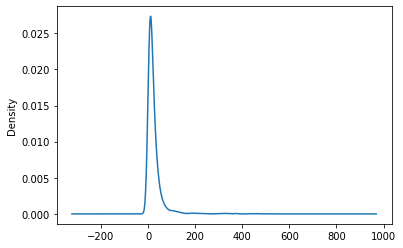

In [101]:
df3['count'] = df3['tokens'].apply(len)
print(df3['count'].describe())
df3['count'].plot.density()

In [102]:
# Remove posts with no tokens
print('Number of Posts with no tokens: %s' % (df3['count']==0).sum())
df3 = df3[df3['count']!=0].reset_index(drop=True)
df3.describe()

Number of Posts with no tokens: 16


,comment,reaction,share,count
count,4293.000000,4293.000000,4293.000000,4293.000000
mean,10.775681,83.414163,2.550664,24.933846
std,48.754685,458.641144,52.657893,41.895198
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,8.000000
50%,1.000000,13.000000,0.000000,15.000000
75%,5.000000,48.000000,1.000000,28.000000
max,887.000000,14000.000000,3300.000000,646.000000


In [103]:
# after cleaning
df_clean = df3
df_clean.sample(5)

,Platform,comment,date,filters,page_id,page_name,raw,reaction,search_term,share,title,user_id,user_name,tokens,count
3311,Facebook,0,2017-07-30,eyJycF9jcmVhdGlvbl90aW1lOjAiOiJ7XCJuYW1lXCI6XC...,2.08894e+14,Pertubuhan Komuniti Penderma Darah Malaysia,Pertubuhan Komuniti Penderma Darah Malaysia\nP...,0,Derma Darah,0,Program Kempen Derma Darah di Kompleks Karamun...,-,-,"[program, kempen, derma, darah, di, kompleks, ...",61
1249,Facebook,1,2016-10-12,eyJycF9jcmVhdGlvbl90aW1lOjAiOiJ7XCJuYW1lXCI6XC...,4.02807e+14,Pusat Darah Negara Kementerian Kesihatan Malaysia,Pusat Darah Negara Kementerian Kesihatan Malay...,36,Blood Donation,0,…for helping those in need. Blood donation dri...,-,-,"[helping, those, in, need, blood, donation, dr...",28
1823,Facebook,10,2015-03-06,eyJycF9jcmVhdGlvbl90aW1lOjAiOiJ7XCJuYW1lXCI6XC...,6.17604e+14,Jadual Kempen Derma Darah Johor Bahru,Jadual Kempen Derma Darah Johor Bahru\n30K lik...,23,Derma Darah,0,Program derma darah 7-8 Mac 2015. Jom derma da...,-,-,"[program, derma, darah, mac, jom, derma, darah]",7
3609,Facebook,0,2016-11-26,eyJycF9jcmVhdGlvbl90aW1lOjAiOiJ7XCJuYW1lXCI6XC...,1.62679e+14,Blood Donation Campaign Malaysia ????????,Blood Donation Campaign Malaysia 马来西亚捐血运动\nPag...,2,Blood Donation,2,PENANG,-,-,[penang],1
1765,Facebook,58,2019-08-24,eyJycF9jcmVhdGlvbl90aW1lOjAiOiJ7XCJuYW1lXCI6XC...,6.17604e+14,Jadual Kempen Derma Darah Johor Bahru,Jadual Kempen Derma Darah Johor Bahru\n30K lik...,213,Blood Donation,0,Hi semua hari ini kami berada di: 👇👇,-,-,"[hi, semua, hari, ini, kami, berada, di]",7


## Store Intermediate Results and Export notebook

In [104]:
df_clean.to_pickle('pickles/df_clean.pkl')

In [105]:
# Convert notebook to html
!jupyter nbconvert --to html_ch --output-dir='.\html' "1. Data Cleaning.ipynb"

[NbConvertApp] Converting notebook 1. Data Cleaning.ipynb to html_ch
[NbConvertApp] Writing 422684 bytes to .\html\1. Data Cleaning.html


# End